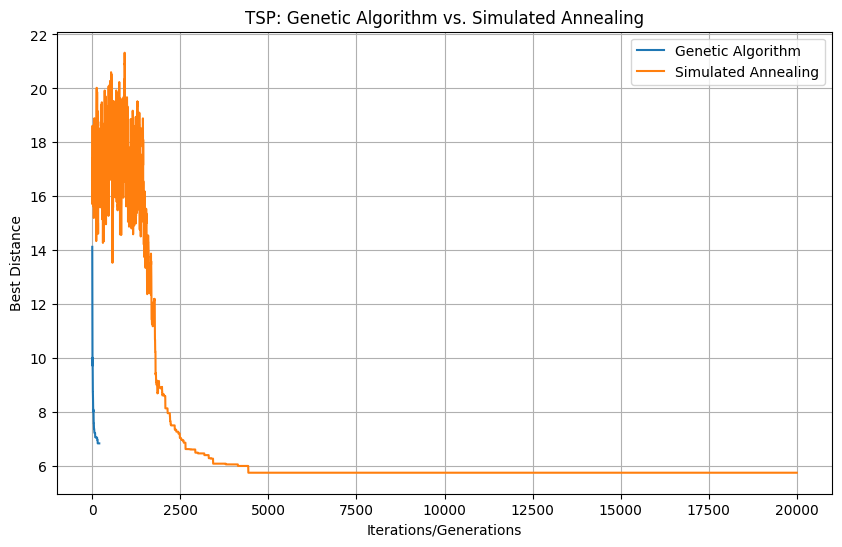

+---------------------+------------------+
| Algorithm           |   Final Distance |
+=====================+==================+
| Genetic Algorithm   |          6.84915 |
+---------------------+------------------+
| Simulated Annealing |          5.76193 |
+---------------------+------------------+


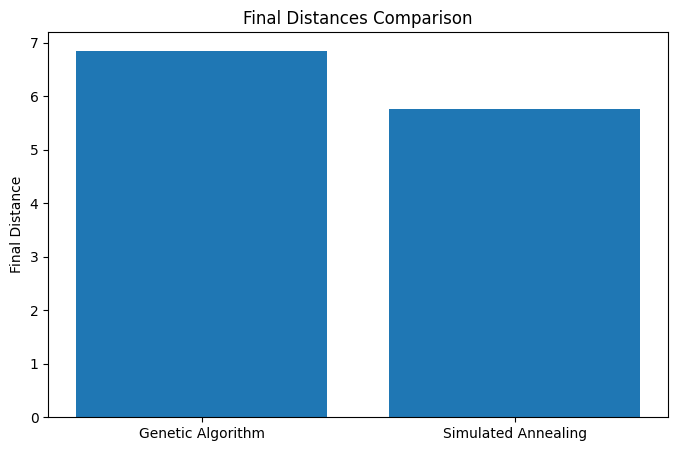

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from tabulate import tabulate

# TSP problem setup
NUM_CITIES = 30
CITIES = np.random.rand(NUM_CITIES, 2)

def calculate_distance(city1, city2):
    return np.linalg.norm(city1 - city2)

def calculate_total_distance(route):
    total_distance = 0
    for i in range(NUM_CITIES):
        total_distance += calculate_distance(CITIES[route[i]], CITIES[route[(i + 1) % NUM_CITIES]])
    return total_distance

# Genetic Algorithm
def genetic_algorithm(population_size, generations, mutation_rate, crossover_rate):
    population = [random.sample(range(NUM_CITIES), NUM_CITIES) for _ in range(population_size)]
    best_distances = []

    for generation in range(generations):
        distances = [calculate_total_distance(route) for route in population]
        best_distances.append(min(distances))

        new_population = []
        for _ in range(population_size):
            tournament = random.sample(range(population_size), 5)
            tournament_distances = [distances[i] for i in tournament]
            winner = tournament[tournament_distances.index(min(tournament_distances))]
            new_population.append(population[winner])

        population = new_population

        for i in range(0, population_size, 2):
            if random.random() < crossover_rate:
                parent1 = population[i]
                parent2 = population[i + 1]
                start = random.randint(0, NUM_CITIES - 2)
                end = random.randint(start + 1, NUM_CITIES - 1)
                child1 = [-1] * NUM_CITIES
                child1[start:end + 1] = parent1[start:end + 1]
                remaining = [city for city in parent2 if city not in child1]
                j = 0
                for k in range(NUM_CITIES):
                    if child1[k] == -1:
                        child1[k] = remaining[j]
                        j += 1
                population[i] = child1

        for i in range(population_size):
            if random.random() < mutation_rate:
                index1, index2 = random.sample(range(NUM_CITIES), 2)
                population[i][index1], population[i][index2] = population[i][index2], population[i][index1]
        mutation_rate = mutation_rate * 0.99
    return best_distances

# Simulated Annealing
def simulated_annealing(initial_temperature, cooling_rate, iterations):
    current_route = random.sample(range(NUM_CITIES), NUM_CITIES)
    current_distance = calculate_total_distance(current_route)
    best_distances = [current_distance]
    temperature = initial_temperature

    for _ in range(iterations):
        new_route = current_route[:]
        index1, index2 = random.sample(range(NUM_CITIES), 2)
        new_route[index1], new_route[index2] = new_route[index2], new_route[index1]
        new_distance = calculate_total_distance(new_route)

        if new_distance < current_distance:
            current_route = new_route
            current_distance = new_distance
        else:
            acceptance_probability = math.exp((current_distance - new_distance) / temperature)
            if random.random() < acceptance_probability:
                current_route = new_route
                current_distance = new_distance
        best_distances.append(current_distance)
        temperature *= cooling_rate

    return best_distances

# Parameters
population_size = 100
generations = 200
mutation_rate = 0.1
crossover_rate = 0.8

initial_temperature = 1000
cooling_rate = 0.995
iterations = 20000

# Run algorithms
ga_distances = genetic_algorithm(population_size, generations, mutation_rate, crossover_rate)
sa_distances = simulated_annealing(initial_temperature, cooling_rate, iterations)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(ga_distances, label="Genetic Algorithm")
plt.plot(sa_distances, label="Simulated Annealing")
plt.xlabel("Iterations/Generations")
plt.ylabel("Best Distance")
plt.title("TSP: Genetic Algorithm vs. Simulated Annealing")
plt.legend()
plt.grid(True)
plt.show()

# Table and Bar Chart
ga_final_distance = ga_distances[-1]
sa_final_distance = sa_distances[-1]

table_data = [
    ["Genetic Algorithm", ga_final_distance],
    ["Simulated Annealing", sa_final_distance],
]
table_headers = ["Algorithm", "Final Distance"]
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))

plt.figure(figsize=(8, 5))
algorithms = ["Genetic Algorithm", "Simulated Annealing"]
final_distances = [ga_final_distance, sa_final_distance]
plt.bar(algorithms, final_distances)
plt.ylabel("Final Distance")
plt.title("Final Distances Comparison")
plt.show()

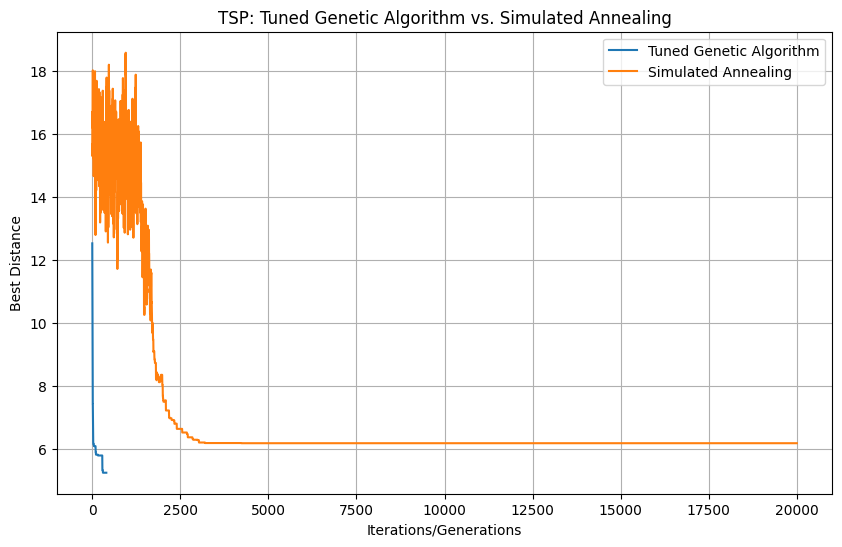

+-------------------------+------------------+
| Algorithm               |   Final Distance |
+=========================+==================+
| Tuned Genetic Algorithm |          5.23971 |
+-------------------------+------------------+
| Simulated Annealing     |          6.17723 |
+-------------------------+------------------+


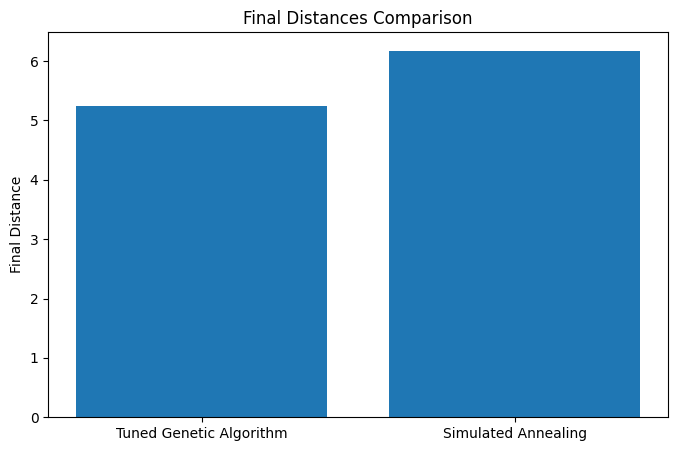

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from tabulate import tabulate

# TSP problem setup
NUM_CITIES = 30
CITIES = np.random.rand(NUM_CITIES, 2)

def calculate_distance(city1, city2):
    return np.linalg.norm(city1 - city2)

def calculate_total_distance(route):
    total_distance = 0
    for i in range(NUM_CITIES):
        total_distance += calculate_distance(CITIES[route[i]], CITIES[route[(i + 1) % NUM_CITIES]])
    return total_distance

# Genetic Algorithm (Tuned)
def genetic_algorithm_tuned(population_size, generations, mutation_rate, crossover_rate, tournament_size):
    population = [random.sample(range(NUM_CITIES), NUM_CITIES) for _ in range(population_size)]
    best_distances = []

    for generation in range(generations):
        distances = [calculate_total_distance(route) for route in population]
        best_distances.append(min(distances))

        new_population = []
        for _ in range(population_size):
            tournament = random.sample(range(population_size), tournament_size)
            tournament_distances = [distances[i] for i in tournament]
            winner = tournament[tournament_distances.index(min(tournament_distances))]
            new_population.append(population[winner])

        population = new_population

        for i in range(0, population_size, 2):
            if random.random() < crossover_rate:
                parent1 = population[i]
                parent2 = population[i + 1]
                start = random.randint(0, NUM_CITIES - 2)
                end = random.randint(start + 1, NUM_CITIES - 1)
                child1 = [-1] * NUM_CITIES
                child1[start:end + 1] = parent1[start:end + 1]
                remaining = [city for city in parent2 if city not in child1]
                j = 0
                for k in range(NUM_CITIES):
                    if child1[k] == -1:
                        child1[k] = remaining[j]
                        j += 1
                population[i] = child1

        for i in range(population_size):
            if random.random() < mutation_rate:
                index1, index2 = random.sample(range(NUM_CITIES), 2)
                population[i][index1], population[i][index2] = population[i][index2], population[i][index1]
        mutation_rate = mutation_rate * 0.99  # Decaying mutation rate
    return best_distances

# Simulated Annealing
def simulated_annealing(initial_temperature, cooling_rate, iterations):
    current_route = random.sample(range(NUM_CITIES), NUM_CITIES)
    current_distance = calculate_total_distance(current_route)
    best_distances = [current_distance]
    temperature = initial_temperature

    for _ in range(iterations):
        new_route = current_route[:]
        index1, index2 = random.sample(range(NUM_CITIES), 2)
        new_route[index1], new_route[index2] = new_route[index2], new_route[index1]
        new_distance = calculate_total_distance(new_route)

        if new_distance < current_distance:
            current_route = new_route
            current_distance = new_distance
        else:
            acceptance_probability = math.exp((current_distance - new_distance) / temperature)
            if random.random() < acceptance_probability:
                current_route = new_route
                current_distance = new_distance
        best_distances.append(current_distance)
        temperature *= cooling_rate

    return best_distances

# Tuned Parameters for GA
population_size = 180  # Increased population size
generations = 400      # Increased generations
mutation_rate = 0.08   # Slightly reduced mutation rate
crossover_rate = 0.9  # Increased crossover rate
tournament_size = 7 #increased tournament size

# Parameters for SA
initial_temperature = 1000
cooling_rate = 0.995
iterations = 20000

# Run algorithms
ga_distances = genetic_algorithm_tuned(population_size, generations, mutation_rate, crossover_rate, tournament_size)
sa_distances = simulated_annealing(initial_temperature, cooling_rate, iterations)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(ga_distances, label="Tuned Genetic Algorithm")
plt.plot(sa_distances, label="Simulated Annealing")
plt.xlabel("Iterations/Generations")
plt.ylabel("Best Distance")
plt.title("TSP: Tuned Genetic Algorithm vs. Simulated Annealing")
plt.legend()
plt.grid(True)
plt.show()

# Table and Bar Chart
ga_final_distance = ga_distances[-1]
sa_final_distance = sa_distances[-1]

table_data = [
    ["Tuned Genetic Algorithm", ga_final_distance],
    ["Simulated Annealing", sa_final_distance],
]
table_headers = ["Algorithm", "Final Distance"]
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))

plt.figure(figsize=(8, 5))
algorithms = ["Tuned Genetic Algorithm", "Simulated Annealing"]
final_distances = [ga_final_distance, sa_final_distance]
plt.bar(algorithms, final_distances)
plt.ylabel("Final Distance")
plt.title("Final Distances Comparison")
plt.show()